<a href="https://colab.research.google.com/github/Smasko7/Machine-Learning-Course/blob/main/Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. Load MNIST dataset

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2. Plot numbers from random samples

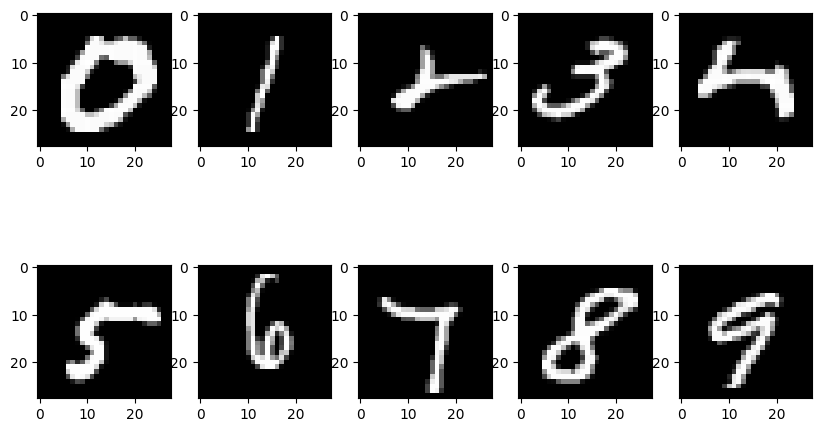

In [13]:
N_digits = 10

fig, ax = plt.subplots(2,5,figsize=(10, 6))
axes = ax.flatten()

for digit in range(N_digits):
  digit_samples = x_train[y_train == digit]
  idx = np.random.randint(len(digit_samples))
  x_train_sample = digit_samples[idx]
  axes[digit].imshow(x_train_sample, cmap='gray')



## 3. Pictures' content

Each picture has size 28x28, corresponding to 784 total pixels. Each pixel has values between 0 and 255. Of course, not all pixels have the same importance for the digit visualization, as most background pixels have value 0.

## 4. Convert pictures into vectors

In [14]:
x_train_vectors = x_train.reshape(x_train.shape[0], -1)
x_test_vectors = x_test.reshape(x_test.shape[0], -1)

print("X_train vectors shape: ", x_train_vectors.shape)
print("X_test vectors shape: ", x_test_vectors.shape)

X_train vectors shape:  (60000, 784)
X_test vectors shape:  (10000, 784)


## 5. KNN

In [15]:
N = x_train_vectors.shape[0]
N_sqrt = int(np.sqrt(N))

# k should be odd
if N_sqrt % 2 == 0:
  N_sqrt += 1

k_list = [5, 15, 51, N_sqrt]

accuracy_train = []
accuracy_test = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train_vectors, y_train)

  prediction_train = knn.predict(x_train_vectors)
  prediction_test = knn.predict(x_test_vectors)

  accuracy_train.append(accuracy_score(prediction_train, y_train))
  accuracy_test.append(accuracy_score(prediction_test, y_test))




### Plot accuracy

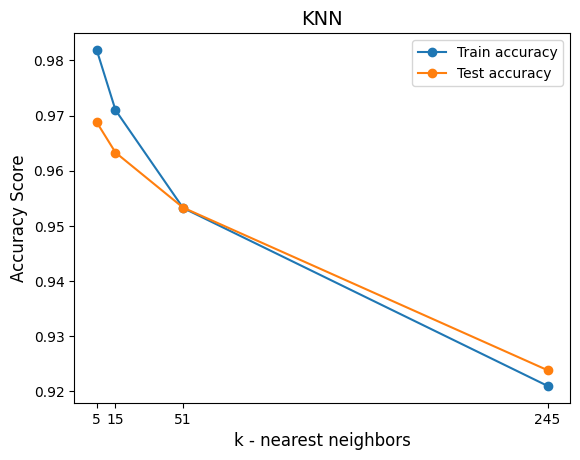

In [16]:
plt.plot(k_list, accuracy_train, marker='o', linestyle='-', label='Train accuracy')

plt.plot(k_list, accuracy_test, marker='o', linestyle='-', label='Test accuracy')

plt.title('KNN', fontsize=14)
plt.xlabel('k - nearest neighbors', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend()

plt.xticks(k_list)

plt.show()

## 6. Scale images

In [17]:
x_train_vectors_scaled = x_train_vectors / 255
x_test_vectors_scaled  = x_test_vectors / 255

accuracy_train_scaled  = []
accuracy_test_scaled  = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
  knn.fit(x_train_vectors_scaled, y_train)

  prediction_train = knn.predict(x_train_vectors_scaled)
  prediction_test = knn.predict(x_test_vectors_scaled)

  accuracy_train_scaled.append(accuracy_score(prediction_train, y_train))
  accuracy_test_scaled.append(accuracy_score(prediction_test, y_test))



### Plot accuracy on scaled images

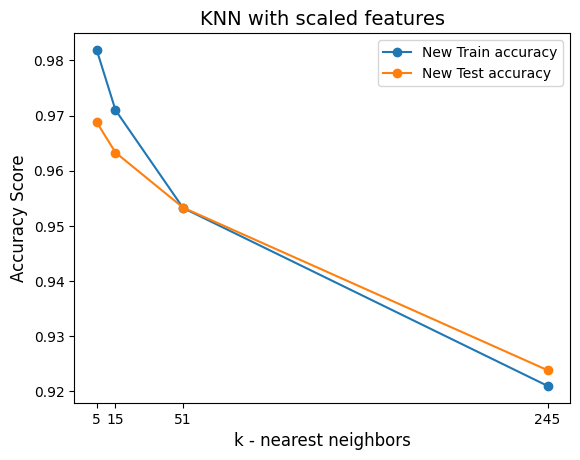

In [18]:
plt.plot(k_list, accuracy_train_scaled, marker='o', linestyle='-', label='New Train accuracy')

plt.plot(k_list, accuracy_test_scaled, marker='o', linestyle='-', label='New Test accuracy')

plt.title('KNN with scaled features', fontsize=14)
plt.xlabel('k - nearest neighbors', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend()

plt.xticks(k_list)

plt.show()

In [19]:
print(accuracy_test_scaled)
print(accuracy_test)

[0.9688, 0.9633, 0.9533, 0.9238]
[0.9688, 0.9633, 0.9533, 0.9238]


It seems that we get the same accuracy scores wether the pixels are scaled or not. This happens because MNIST pixel features have the exact same range ([0-255]), although it is not normalized to [0,1]. Thus, the uniform scaling does not change the decision boundaries for the KNN algorithm, leading to the same results as the unscaled case.

We would get different results in scaled and unscaled cases, if the unscaled features were on different ranges. Then, the feature with the larger range would dominate the distance calculation and would result in different decision boundaries for our classification problem.

## Test on custom image

### Plot Image

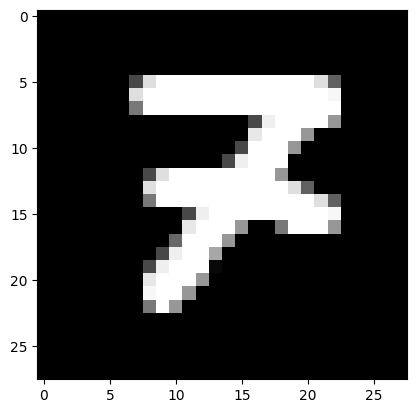

In [20]:
img = Image.open("test_MNIST_sample2.png")
plt.imshow(img, cmap='gray')

### Convert image from rgb to gray scale

In [42]:
img_gray = img.convert('L')

img_gray_array = np.array(img_gray)
img_rgb_array = np.array(img)

print(f"From RGB image, with shape: {img_rgb_array.shape} --> converted to gray scale image of shape: {img_gray_array.shape}")



From RGB image, with shape: (28, 28, 3) --> converted to gray scale image of shape: (28, 28)


### Apply the best KNN (k=5)

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
knn.fit(x_train_vectors_scaled, y_train)

img_gray_array = img_gray_array.reshape(1, -1)
img_gray_array_scaled = img_gray_array / 255

prediction = knn.predict(img_gray_array_scaled)

prediction_test = knn.predict(x_test_vectors_scaled)
print(accuracy_score(prediction_test, y_test))

print(f"For the test digit 7: Prediction = {prediction}")

0.9688
For the test digit 7: Prediction = [1]


<Figure size 1000x1000 with 0 Axes>

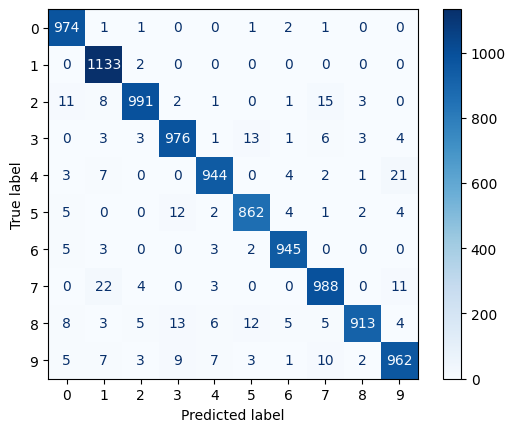

In [23]:
cm = confusion_matrix(y_test, prediction_test)

plt.figure(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test))

disp.plot(cmap=plt.cm.Blues)


The test digit (number 7) that we provided was misclassified as "1". By plotting the confusion matrix of the knn classifier, we can realize that this case is the most common to be misclassified.

For the test digit 5: Prediction = [5]


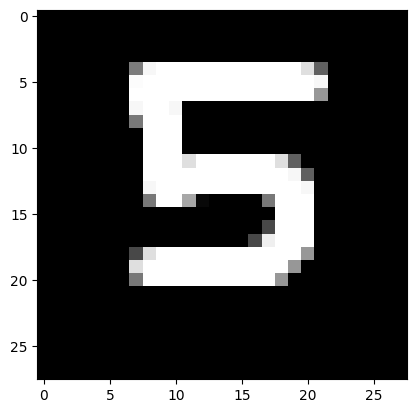

In [41]:
img = Image.open("test_MNIST_sample5.png")
# plt.imshow(img, cmap='gray')

img_gray = img.convert('L')
plt.imshow(img_gray, cmap='gray')

img_gray_array = np.array(img_gray)

img_gray_array = img_gray_array.reshape(1, -1)
img_gray_array_scaled = img_gray_array / 255

prediction = knn.predict(img_gray_array_scaled)

print(f"For the test digit 5: Prediction = {prediction}")